<a href="https://colab.research.google.com/github/kate-markina2709/Lab/blob/main/%D0%9B%D0%A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка изучаемого изображения

In [ ]:
from google.colab import files
from skimage.io import imread, imsave
from matplotlib import pyplot as plt
from skimage.io import imshow, show
from skimage.filters import median
from skimage.exposure import match_histograms,histogram
from skimage.morphology import disk, diamond, star, rectangle
import numpy as np
import json
import matplotlib

uploaded= files.upload()

Saving lab_1.jpg to lab_1 (1).jpg


In [ ]:
settings= {
    'parameter_0':'lab_1.jpg'
}
with open('settings.json', 'w') as fp:
    json.dump(settings, fp)

In [ ]:
with open('settings.json') as json_file:
    json_data = json.load(json_file)

for entry in json_data.keys():
  print(f'Название параметра: {entry}, тип параметра: {type(json_data[entry])}, значение параметра: {json_data[entry]}') 



Название параметра: parameter_0, тип параметра: <class 'str'>, значение параметра: lab_1.jpg


In [ ]:
path = json_data['parameter_0']
img = imread(path)
#print(img)


In [ ]:
median_1 = median(img, np.dstack(rectangle(8,6)), mode='wrap')
median_2 = median(img, np.dstack((diamond(5),diamond(5),diamond(5))), mode='nearest')
median_3 = median(img, np.dstack((disk(7),disk(7),disk(7))), mode='reflect')
median_4 = median(img, np.dstack((star(3),star(3),star(3))), mode='mirror')
median_5 = median(img, np.dstack((disk(7),disk(7),disk(7))), mode='mirror')


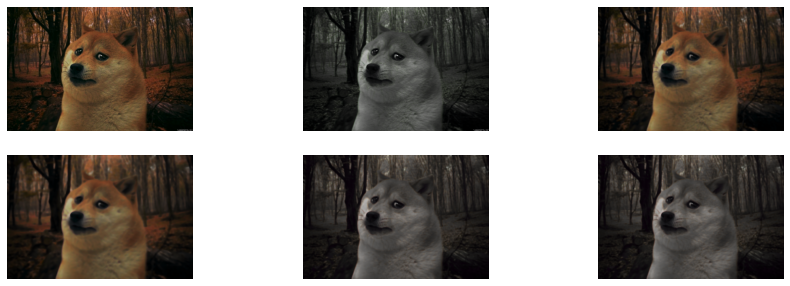

In [ ]:
fig, axes=plt.subplots(nrows=2, ncols=3,figsize=( 15, 5))
axes[0][0].set_axis_off()
axes[0][0].imshow(img)
axes[0][1].set_axis_off()
axes[0][1].imshow(median_1)
axes[0][2].set_axis_off()
axes[0][2].imshow(median_2)
axes[1][0].set_axis_off()
axes[1][0].imshow(median_3)
axes[1][1].set_axis_off()
axes[1][1].imshow(median_4)
axes[1][2].set_axis_off()
axes[1][2].imshow(median_4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  after removing the cwd from sys.path.


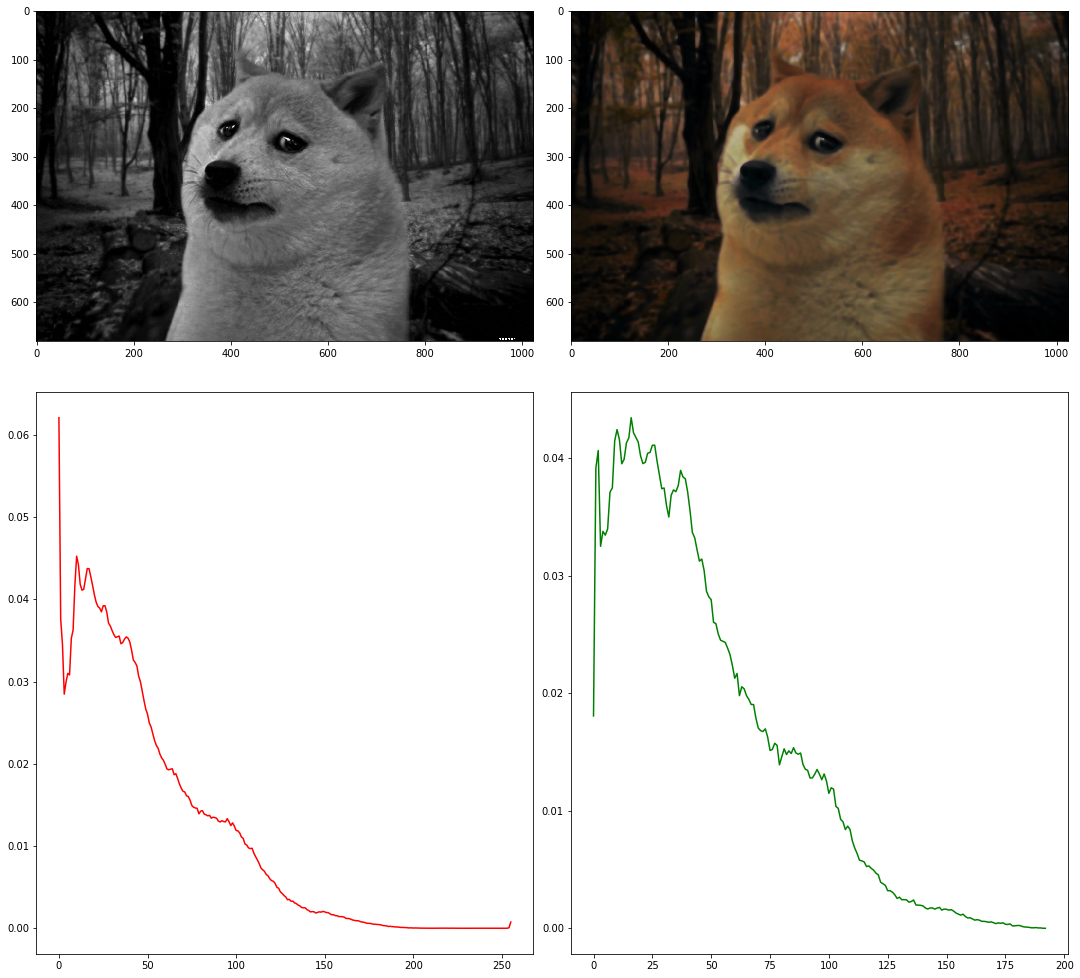

In [143]:
img_im = img[:, :, 0]
img_im1 = median_2[:, :, 1]
hist_red, bins_red = histogram(img)
hist_green, bins_green = histogram(median_2)
fig=plt.figure(figsize=(15, 15))
fig.add_subplot(2,2,1)
imshow(img_im)
fig.add_subplot(2,2,2)
imshow(median_2)
fig.add_subplot(2,2,3)
plt.plot(bins_red, hist_red/(img.shape[0]*img.shape[1]), color = 'red')
fig.add_subplot(2,2,4)
plt.plot(bins_green, hist_green/(median_2.shape[0]*median_2.shape[1]), color = 'green')

In [ ]:
fig.savefig('image')

In [ ]:
# стараемся не уронить сессию
%reset -f